In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install -r /content/gdrive/MyDrive/Colab\ Notebooks/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [ ]:
# from pydoc import doc
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

root_path = r'/content/gdrive/MyDrive/Colab Notebooks'
os.chdir(root_path)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0
text_list = []
neutral_list = []
negative_list = []
positive_list = []
nrows = 0

with open('yelp_data.xlsx', 'rb') as input_file:
  yelp_df = pd.read_excel(input_file)

  for index, row in yelp_df.iterrows():
    # print(index, row['user_id'], row['review_id'], row['useful'], row['cool'], row['funny'], row['text'])
    nrows += 1
    # if nrows > 100:
    #   break

    row_text = row['text']
    text_list.append(row_text)
    analysis = TextBlob(row_text)
    score = SentimentIntensityAnalyzer().polarity_scores(row_text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
      negative_list.append(row_text)
      negative += 1
    elif pos > neg:
      positive_list.append(row_text)
      positive += 1

    elif pos == neg:
      neutral_list.append(row_text)
      neutral += 1


  pos_percent = percentage(positive, nrows)
  neg_percent = percentage(negative, nrows)
  neu_percent = percentage(neutral, nrows)
  polarity_percent = percentage(polarity, nrows)
  pos_percent = format(pos_percent, '.1f')
  neg_percent = format(neg_percent, '.1f')
  neu_percent = format(neu_percent, '.1f')



In [ ]:
text_list_df = pd.DataFrame(text_list)
text_list_df.drop_duplicates(inplace = True)

neutral_list_df = pd.DataFrame(neutral_list)
negative_list_df = pd.DataFrame(negative_list)
positive_list_df = pd.DataFrame(positive_list)
print("total number: ",len(text_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5847
positive number:  5554
negative number:  265
neutral number:  28


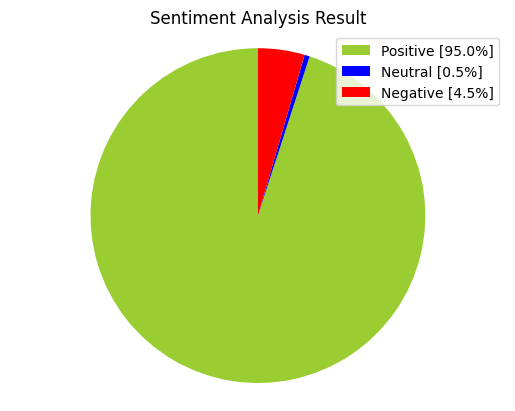

In [ ]:
#Creating PieChart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.show()

In [ ]:
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))